In [114]:
import csv

import pandas as pd

mmlu_num_maj_df = pd.read_csv(
    "../data/mmlu_pro_stem_reasoning_score.tsv",
    sep="\t",
    header=0,
    quoting=csv.QUOTE_NONE,
    quotechar="",
    escapechar="\\",
)


mmlu_num_maj_df["category"] = mmlu_num_maj_df["category"].str.capitalize()
mmlu_num_maj_df["masj_num_reasoning_steps"] = mmlu_num_maj_df["masj_num_reasoning_steps"].str.capitalize()
mmlu_num_maj_df["masj_requires_reasoning"] = mmlu_num_maj_df["masj_requires_reasoning"].str.capitalize()
mmlu_num_maj_df["masj_requires_knowledge"] = mmlu_num_maj_df["masj_requires_knowledge"].str.capitalize()

In [115]:
print(mmlu_num_maj_df.value_counts("masj_requires_knowledge"))
print(mmlu_num_maj_df.value_counts("masj_requires_reasoning"))
print(mmlu_num_maj_df.value_counts("masj_num_reasoning_steps"))

masj_requires_knowledge
Yes    11171
No       220
Name: count, dtype: int64
masj_requires_reasoning
Yes    9067
No     2323
Name: count, dtype: int64
masj_num_reasoning_steps
Medium    7536
Low       2774
High      1078
Name: count, dtype: int64


/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_25394/1791848733.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


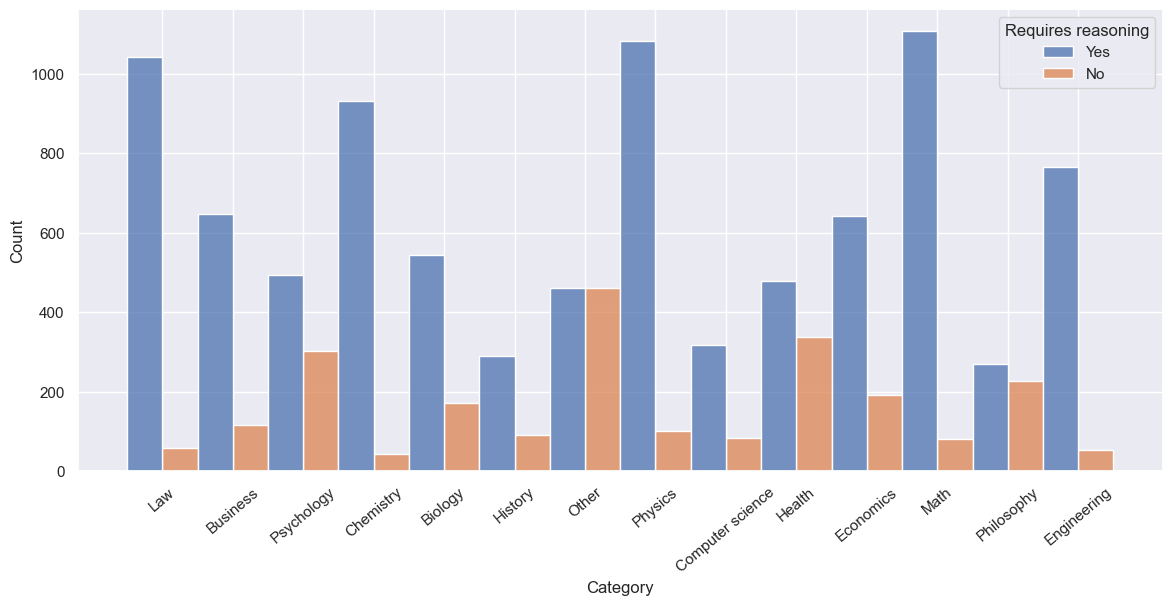

<Figure size 1400x600 with 0 Axes>

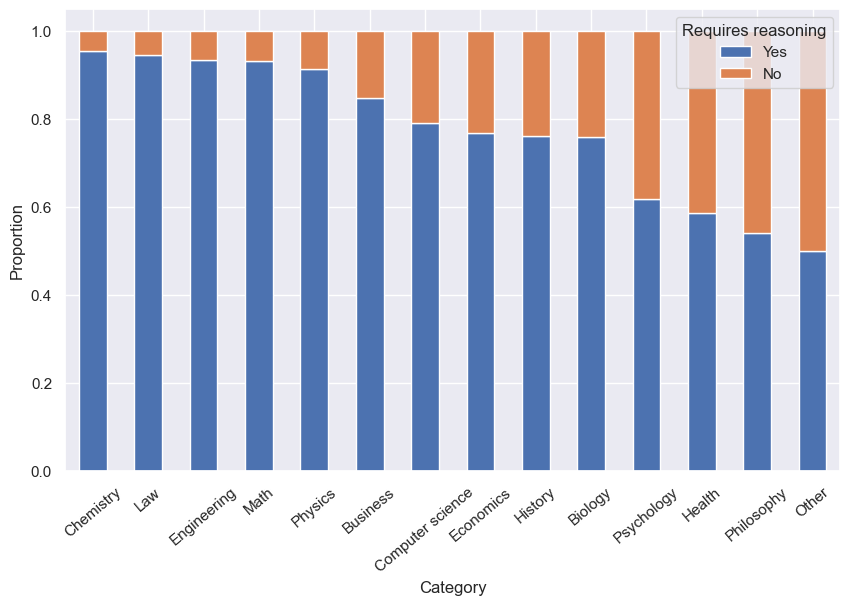

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    # bins=len(mmlu_num_maj_df["category"].unique()),
    hue="masj_requires_reasoning",
    hue_order=["Yes", "No"],
    multiple="dodge",
)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Yes", "No"], title="Requires reasoning")


value_counts_df = mmlu_num_maj_df.value_counts(["category", "masj_requires_reasoning"]).reset_index(name="count")
value_counts_df["proportion"] = value_counts_df["count"] / value_counts_df.groupby("category")["count"].transform("sum")
value_counts_df.sort_values("proportion", inplace=True)

pivoted_data = value_counts_df.pivot(index="category", columns="masj_requires_reasoning", values="proportion")
pivoted_data = pivoted_data[["Yes", "No"]]
pivoted_data.sort_values("Yes", ascending=False, inplace=True)
# print(pivoted_data)

plt.figure(figsize=(14, 6))
# ax = sns.barplot(
#     value_counts_df,
#     x="category",
#     y="proportion",
#     hue="masj_requires_reasoning",
#     hue_order=["yes", "no"],
#     # hue_norm=(0, 1),
#     multiple="stack",
# )
ax = pivoted_data.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Category")
ax.set_ylabel("Proportion")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Yes", "No"], title="Requires reasoning")


/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_25394/2667072257.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_25394/2667072257.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


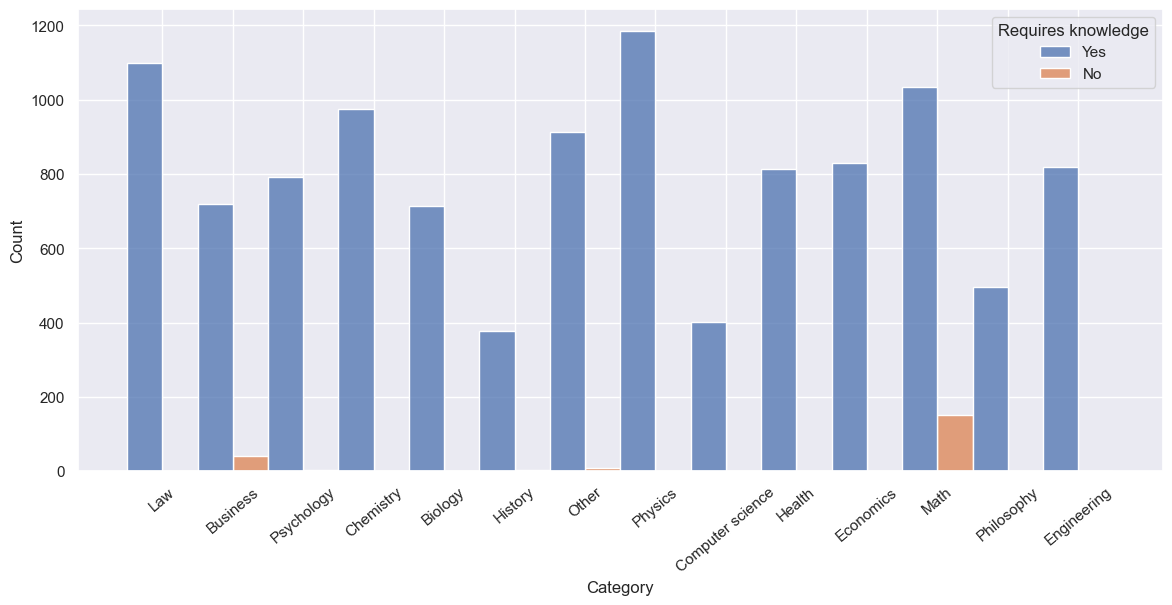

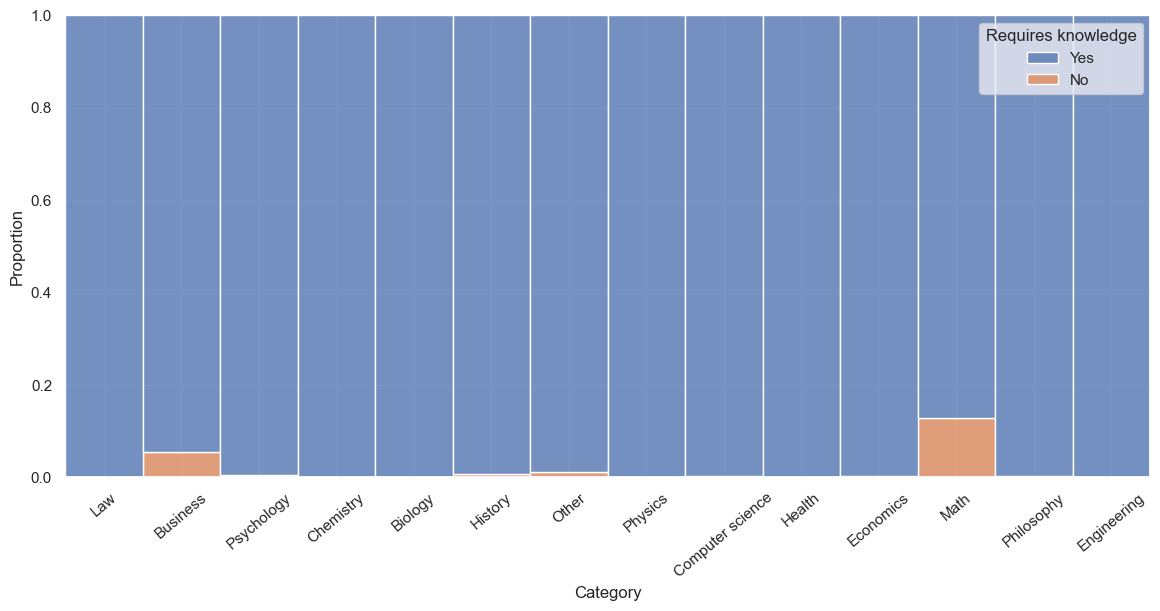

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    hue="masj_requires_knowledge",
    hue_order=["Yes", "No"],
    multiple="dodge",
)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Yes", "No"], title="Requires knowledge")

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    hue="masj_requires_knowledge",
    hue_order=["Yes", "No"],
    multiple="fill",
)
ax.set_xlabel("Category")
ax.set_ylabel("Proportion")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Yes", "No"], title="Requires knowledge")

/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_25394/3596863061.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


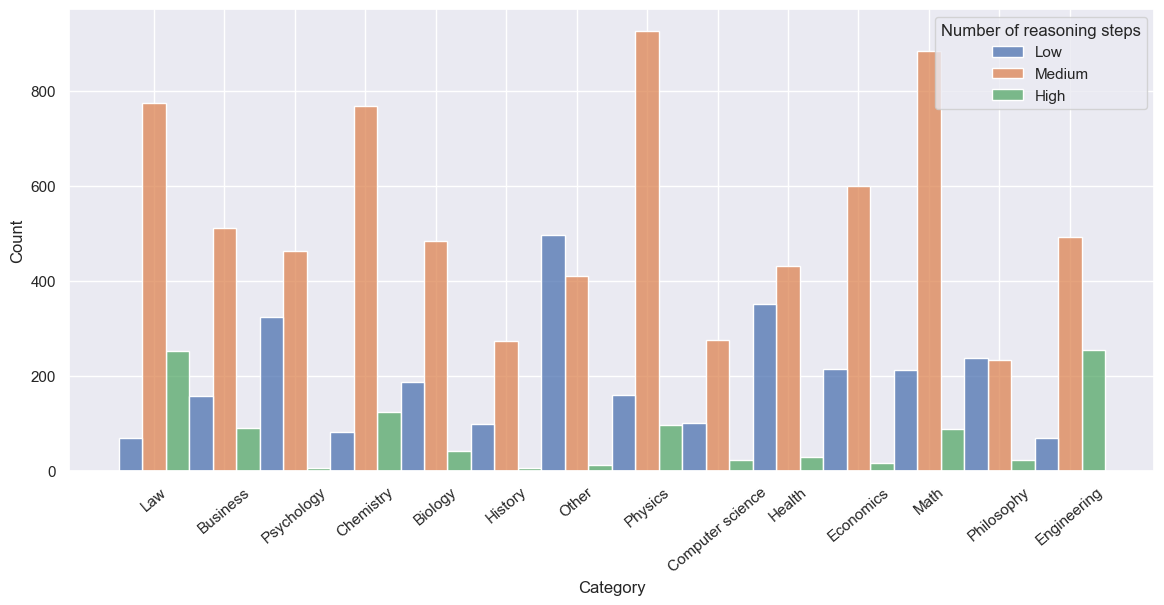

<Figure size 1400x600 with 0 Axes>

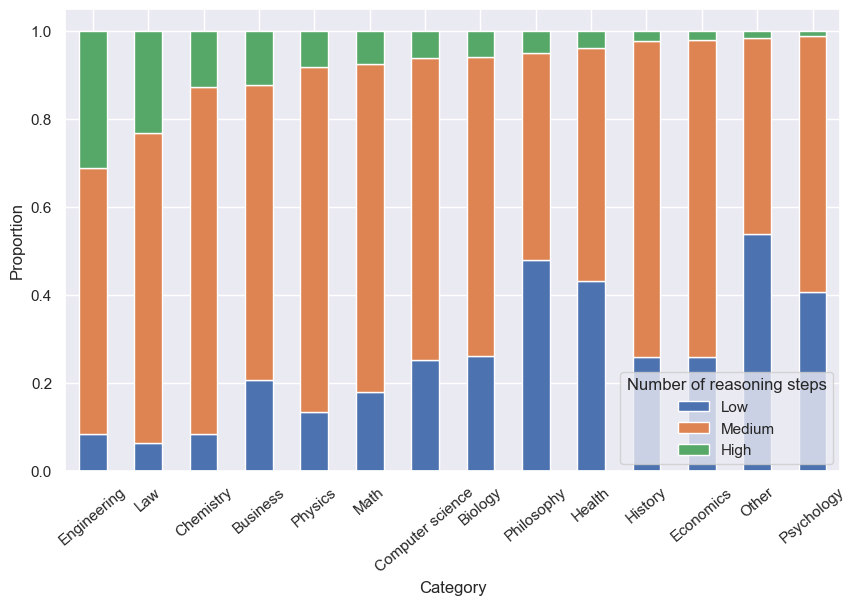

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    bins=len(mmlu_num_maj_df["category"].unique()),
    hue="masj_num_reasoning_steps",
    hue_order=["Low", "Medium", "High"],
    multiple="dodge",
)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Low", "Medium", "High"], title="Number of reasoning steps")

value_counts_df = mmlu_num_maj_df.value_counts(["category", "masj_num_reasoning_steps"]).reset_index(name="count")
value_counts_df["proportion"] = value_counts_df["count"] / value_counts_df.groupby("category")["count"].transform("sum")
# value_counts_df.sort_values("proportion", inplace=True)

pivoted_data = value_counts_df.pivot(index="category", columns="masj_num_reasoning_steps", values="proportion")
pivoted_data = pivoted_data[["Low", "Medium", "High"]]
pivoted_data.sort_values("High", ascending=False, inplace=True)
# print(pivoted_data)

plt.figure(figsize=(14, 6))
# ax = sns.barplot(
#     value_counts_df,
#     x="category",
#     y="proportion",
#     hue="masj_requires_reasoning",
#     hue_order=["yes", "no"],
#     # hue_norm=(0, 1),
#     multiple="stack",
# )
ax = pivoted_data.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Category")
ax.set_ylabel("Proportion")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Low", "Medium", "High"], title="Number of reasoning steps")
